# Modely

## Příprava dat

In [ ]:
pip install scikit-plot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action = 'ignore' , category=DeprecationWarning)

In [2]:
#naloadování balíčků
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import scikitplot as skplt

#pandas, numpy, random.randint
import pandas as pd
import numpy as np
from random import randint
#sklearn preprocessing functions
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#sklearn model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
#matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#sampling
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [3]:
np.random.seed(12345)

In [4]:
df= pd.read_csv(filepath_or_buffer="ModelBanking01.csv")

In [5]:
df

,Unnamed: 0,Customer_ID,Gender,Age_Groups,Ten_Groups,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,...,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions,New_Credit_Card_Flag
0,0,1,M,Střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,20044.611429,0.000000,20044.611429,0,0,0,0,0,0,0
1,1,2,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,2430.224286,2430.224286,4,3,0,0,0,7,0
2,2,3,M,Střední,Nový,18.825714,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
3,3,4,M,Starší střední,Nový,0.000000,603.791429,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,7,7,0,0,12,26,0
4,4,5,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,2.720000,2.720000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,F,Starší střední,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,6634.375714,6634.375714,5,0,0,0,0,5,0
9996,9996,9997,M,Mladší střední,Nový,8036.300000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,5,0,0,0,0,5,0
9997,9997,9998,F,Mladší střední,Nový,6268.200000,0.000000,26299.425714,6100.382857,0.0,...,0.000000,0.000000,0.000000,5,0,6,2,0,13,1
9998,9998,9999,F,Mladý,Nový,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,2718.712857,2718.712857,1,0,0,0,0,1,0


In [6]:
# přetypování sloupců na boolean
df['Saving_Amount'] = [True if i > 0 else False for i in df['Saving_Amount']]
df['Current_Amount'] = [True if i > 0 else False for i in df['Current_Amount']]
df['Time_Deposits_Amount'] = [True if i > 0 else False for i in df['Time_Deposits_Amount']]
df['Funds_Amount'] = [True if i > 0 else False for i in df['Funds_Amount']]
df['Stocks_Amount'] =[True if i > 0 else False for i in df['Stocks_Amount']]
df['Bank_Assurance_Amount'] = [True if i > 0 else False for i in df['Bank_Assurance_Amount']]
df['Life_Assurance_Amount'] = [True if i > 0 else False for i in df['Life_Assurance_Amount']]
df['Home_Loan_Amount'] = [True if i > 0 else False for i in df['Home_Loan_Amount']]
df['Business_Loan_Amount'] =[True if i > 0 else False for i in df['Business_Loan_Amount']]
df['Consumer_Loan_Amount'] =[True if i > 0 else False for i in df['Consumer_Loan_Amount']]
df['Branch_Transactions'] = [True if i > 0 else False for i in df['Branch_Transactions']]
df['ATM_Transactions'] = [True if i > 0 else False for i in df['ATM_Transactions']]
df['Phone_Transactions'] = [True if i > 0 else False for i in df['Phone_Transactions']]
df['Internet_Transactions'] = [True if i > 0 else False for i in df['Internet_Transactions']]
df['Standing_Orders'] = [True if i > 0 else False for i in df['Standing_Orders']]

#### Label Encoder 

In [7]:
gender = df.select_dtypes(include = "object").columns
boolean = df.select_dtypes(include = "bool").columns

In [8]:
# binární hodnoty pomocí Laber Encoder (popř. lze využít OHE)
le = preprocessing.LabelEncoder()
for i in gender:
    df[i] = le.fit_transform(df[i].astype(str))
for i in boolean:
    df[i] = le.fit_transform(df[i].astype(str))

In [9]:
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])
le.fit(df['Age_Groups'])
df['Age_Groups']=le.transform(df['Age_Groups'])
le.fit(df['Ten_Groups'])
df['Ten_Groups']=le.transform(df['Ten_Groups'])

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [10]:
# dropnutí 1. sloupce
df.drop(df.columns[[0,1,7,9]], axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age_Groups,Ten_Groups,Saving_Amount,Current_Amount,Funds_Amount,Money_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions,New_Credit_Card_Flag
0,1,4,2,0,0,0,0.000000,1,0,0,1,0,20044.611429,0,0,0,0,0,0,0
1,0,3,2,0,0,0,0.000000,0,1,0,0,1,2430.224286,1,1,0,0,0,7,0
2,1,4,2,1,0,0,18.825714,0,0,0,0,0,0.000000,0,0,0,0,0,0,0
3,1,3,2,0,1,0,603.791429,0,0,0,0,0,0.000000,1,1,0,0,1,26,0
4,0,3,2,0,0,0,0.000000,0,0,0,0,1,2.720000,0,0,0,0,0,0,0


In [12]:
# dataset pro mod.to_csv('ModelBanking01.csv')
# dataset pro modelaci v Rapid Miner
df.to_csv('RapidMinerData1.csv')

## Train a test split

In [13]:
X = df.drop(['New_Credit_Card_Flag'], axis=1)
Y = df['New_Credit_Card_Flag']

In [14]:
x_train, x_Combine, y_train, y_Combine = train_test_split(X,Y,
                                              train_size=0.8,
                                              random_state=42)

In [15]:
x_val, x_test, y_val, y_test = train_test_split(x_Combine,
                                                y_Combine,
                                                test_size=0.5,
                                                random_state=42)

## Oversampling vs Undersampling


In [17]:
print("Před OS, počet hodnot '1': {}".format(sum(y_train == 1)))
print("Před OS, počet hodnot '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_b, Y_train_b = sm.fit_resample(x_train, y_train.ravel())

print('Po OS, struktura X_train: {}'.format(X_train_b.shape))
print('Po OS, struktura Y_train: {} \n'.format(Y_train_b.shape))

print("PO OS, počet hodnot '1': {}".format(sum(Y_train_b == 1)))
print("PO OS, počet hodnot '0': {}".format(sum(Y_train_b == 0)))

Před OS, počet hodnot '1': 692
Před OS, počet hodnot '0': 7308 

Po OS, struktura X_train: (14616, 19)
Po OS, struktura Y_train: (14616,) 

PO OS, počet hodnot '1': 7308
PO OS, počet hodnot '0': 7308


In [18]:
# použití NearMiss, dorovnání hodnot pomocí UNDERSAMPLING
print("Před US, počet hodnot '1': {}".format(sum(y_train == 1)))
print("Před US, počet hodnot '0': {} \n".format(sum(y_train == 0)))
  
nr = NearMiss()
  
X_train_miss, Y_train_miss = nr.fit_resample(x_train, y_train.ravel())
  
print('Po US, struktura X_train: {}'.format(X_train_miss.shape))
print('Po US, struktura Y_train: {} \n'.format(Y_train_miss.shape))
  
print("Po US, počet hodnot '1': {}".format(sum(Y_train_miss == 1)))
print("Po US, počet hodnot '0': {}".format(sum(Y_train_miss == 0)))

Před US, počet hodnot '1': 692
Před US, počet hodnot '0': 7308 

Po US, struktura X_train: (1384, 19)
Po US, struktura Y_train: (1384,) 

Po US, počet hodnot '1': 692
Po US, počet hodnot '0': 692


## Oversampling

In [19]:
Y_train_b = pd.DataFrame(Y_train_os, columns = ['New_Credit_Card_Flag'])


In [20]:
# máme stejný počet hodnot s 0 a 1 v train setu
Y_train_b.value_counts()

New_Credit_Card_Flag
0                       7308
1                       7308
dtype: int64

In [21]:
# pro porovnání hodnoty v test setu, které zůstavají neměnné
y_test.value_counts()

0    915
1     85
Name: New_Credit_Card_Flag, dtype: int64

In [22]:
y_val.value_counts()

0    904
1     96
Name: New_Credit_Card_Flag, dtype: int64

<AxesSubplot:>

Text(0.5, 1.0, 'Balanced Correlation Matrix')

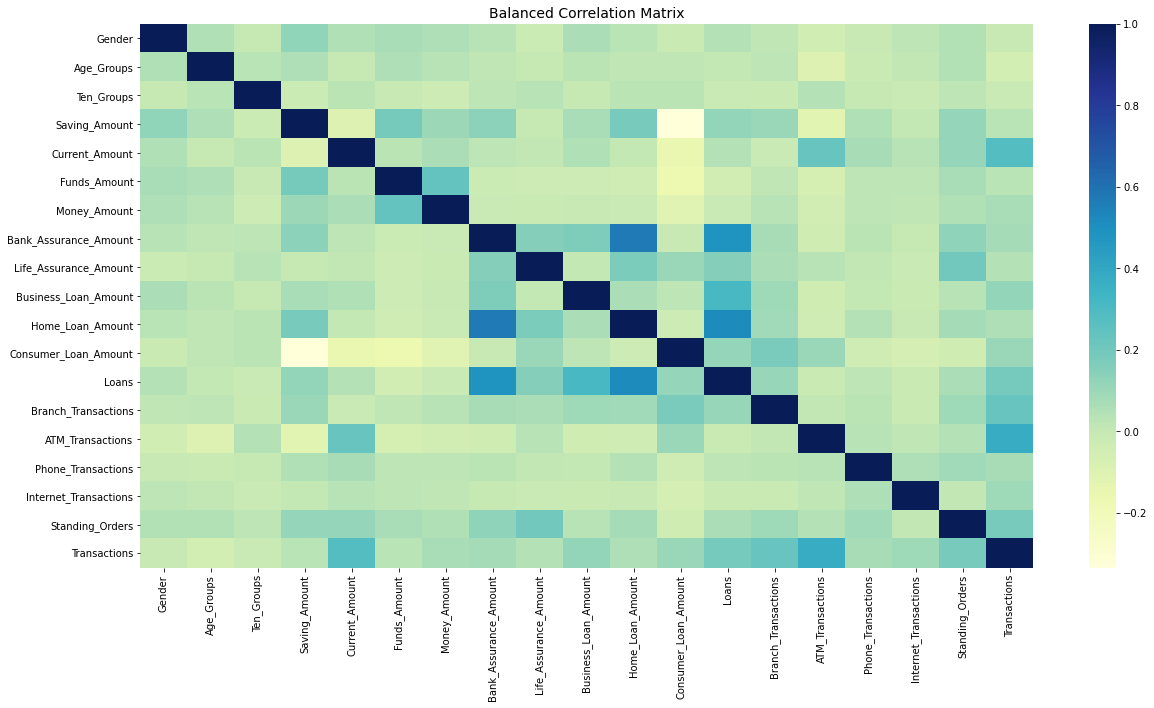

In [23]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = X_train_b.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

In [24]:
corr

,Gender,Age_Groups,Ten_Groups,Saving_Amount,Current_Amount,Funds_Amount,Money_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loans,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Transactions
Gender,1.000000,0.053731,0.002649,0.127350,0.053654,0.068463,0.057235,0.040152,-0.017018,0.062952,0.032284,-0.012871,0.044927,0.015372,-0.038370,-0.000588,0.021721,0.050018,-0.002603
Age_Groups,0.053731,1.000000,0.032544,0.057665,0.001505,0.060409,0.036125,0.018116,0.002415,0.030745,0.016344,0.016155,0.009997,0.021228,-0.097993,-0.012413,0.013760,0.046961,-0.048277
Ten_Groups,0.002649,0.032544,1.000000,-0.020320,0.027882,-0.003082,-0.021305,0.024221,0.036280,0.003901,0.027411,0.030327,-0.010428,-0.011450,0.042390,0.004112,-0.010096,0.023446,-0.010411
Saving_Amount,0.127350,0.057665,-0.020320,1.000000,-0.091134,0.189706,0.102345,0.139149,0.003465,0.067517,0.187152,-0.333840,0.120091,0.109022,-0.117010,0.056106,0.007575,0.114981,0.032757
Current_Amount,0.053654,0.001505,0.027882,-0.091134,1.000000,0.029165,0.066589,0.022623,0.010978,0.054373,0.007916,-0.146462,0.041571,-0.007120,0.229980,0.077163,0.038841,0.116885,0.281287
Funds_Amount,0.068463,0.060409,-0.003082,0.189706,0.029165,1.000000,0.238288,-0.017032,-0.025838,-0.024393,-0.027550,-0.166992,-0.043847,0.016533,-0.062325,0.023959,0.022695,0.069769,0.033733
Money_Amount,0.057235,0.036125,-0.021305,0.102345,0.066589,0.238288,1.000000,-0.008369,-0.015670,-0.005191,-0.009609,-0.105145,-0.010283,0.038478,-0.042513,0.022040,0.019032,0.054555,0.070085
Bank_Assurance_Amount,0.040152,0.018116,0.024221,0.139149,0.022623,-0.017032,-0.008369,1.000000,0.151688,0.171064,0.576536,-0.002049,0.488552,0.077238,-0.032846,0.029004,0.003065,0.131505,0.082183
Life_Assurance_Amount,-0.017018,0.002415,0.036280,0.003465,0.010978,-0.025838,-0.015670,0.151688,1.000000,0.004847,0.175316,0.105437,0.151200,0.065387,0.039406,0.012428,-0.007278,0.199702,0.043761
Business_Loan_Amount,0.062952,0.030745,0.003901,0.067517,0.054373,-0.024393,-0.005191,0.171064,0.004847,1.000000,0.065657,0.024992,0.313706,0.097921,-0.034758,0.010027,-0.012917,0.040008,0.120772


In [79]:
# StandardScaler pro normalizaci dat
scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train_b)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [80]:
print("x_test", x_test.shape[0])
print("y_test", y_test.shape[0])
print("X_train_b", X_train_b.shape[0])
print("Y_train_b", Y_train_b.shape[0])
print("x_val", x_val.shape[0])
print("y_val", y_val.shape[0])
print("x_train", x_train.shape[0])
print("y_train", y_train.shape[0])

x_test 1000
y_test 1000
X_train_b 14616
Y_train_b 14616
x_val 1000
y_val 1000
x_train 8000
y_train 8000


In [81]:
x_test

array([[-1.14779139,  1.61097985,  1.64385174, ..., -0.14277733,
        -0.18663956, -0.70793933],
       [-1.14779139,  0.88950413,  0.84152298, ..., -0.14277733,
        -0.18663956, -0.70793933],
       [ 0.87123845, -1.27492301,  0.03919422, ...,  7.0039128 ,
        -0.18663956,  0.09215665],
       ...,
       [-1.14779139, -1.27492301, -0.76313454, ..., -0.14277733,
        -0.18663956, -0.70793933],
       [ 0.87123845, -0.5534473 ,  1.64385174, ..., -0.14277733,
        -0.18663956,  2.89249258],
       [ 0.87123845,  0.16802842, -1.5654633 , ..., -0.14277733,
        -0.18663956, -0.54792014]])

In [82]:
x_val

array([[ 1.00000000e+00,  1.00000000e+00,  4.00000000e+00, ...,
        -3.88912280e-18, -7.77824560e-18,  0.00000000e+00],
       [-1.24451930e-16,  1.00000000e+00,  4.00000000e+00, ...,
        -3.88912280e-18, -7.77824560e-18,  6.00000000e+00],
       [ 1.00000000e+00,  4.00000000e+00,  2.00000000e+00, ...,
        -3.88912280e-18, -7.77824560e-18,  0.00000000e+00],
       ...,
       [ 1.00000000e+00, -3.11129824e-17,  2.00000000e+00, ...,
        -3.88912280e-18, -7.77824560e-18,  0.00000000e+00],
       [ 1.00000000e+00,  3.00000000e+00,  2.00000000e+00, ...,
        -3.88912280e-18, -7.77824560e-18,  6.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  4.00000000e+00, ...,
        -3.88912280e-18, -7.77824560e-18,  2.00000000e+00]])

## Random Forest

In [83]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True)
acc_rfc_cv=cross_val_score(estimator=rfc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Random Forest Classifier using K-fold cross validation is :",np.mean(acc_rfc_cv))

rfc.fit(X_train_b, Y_train_b)
y_pred_rfc = rfc.predict(x_val)
acc_rfc = metrics.accuracy_score(y_pred_rfc, y_val)
print('Accuracy of test Random Forest Classifier is: ', metrics.accuracy_score(y_pred_rfc, y_val))
print('Classification report: ', classification_report(y_val, y_pred_rfc))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_rfc))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Average accuracy of Random Forest Classifier using K-fold cross validation is : 0.7482230187333039


<ipython-input-83-f17b765c6407>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_b, Y_train_b)


RandomForestClassifier(max_depth=2, max_features='auto')

Accuracy of test Random Forest Classifier is:  0.718
Classification report:                precision    recall  f1-score   support

           0       0.91      0.76      0.83       904
           1       0.13      0.33      0.18        96

    accuracy                           0.72      1000
   macro avg       0.52      0.55      0.51      1000
weighted avg       0.84      0.72      0.77      1000

Confusion matrix:  [[686 218]
 [ 64  32]]


#### Optimalizace parametrů 

In [84]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'bootstrap': [True, False],
    'criterion' :['gini', 'entropy'],
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_b, Y_train_b)
print("tuned hyperparameters :",CV_rfc.best_params_)
print("tuned parameter accuracy (best score):",CV_rfc.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']})

tuned hyperparameters : {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}
tuned parameter accuracy (best score): 0.8405886284213182


In [85]:
rfc2 = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= 6, max_features= 'sqrt')
acc_rfc_cv2=cross_val_score(estimator=rfc2,X=x_val,y=y_val,cv=10)  #K=10
print("Average accuracy of Random Forest Classifier using K-fold cross validation is :",np.mean(acc_rfc_cv2))

rfc2.fit(x_val, y_val)
y_pred_rfc2 = rfc2.predict(x_test)
acc_rfc2 = metrics.accuracy_score(y_pred_rfc2, y_test)
print('Accuracy of test Random Forest Classifier is: ', metrics.accuracy_score(y_pred_rfc2, y_test))
print('Classification report: ', classification_report(y_test, y_pred_rfc2))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_rfc2))

Average accuracy of Random Forest Classifier using K-fold cross validation is : 0.9199999999999999


RandomForestClassifier(bootstrap=False, max_depth=6)

Accuracy of test Random Forest Classifier is:  0.927
Classification report:                precision    recall  f1-score   support

           0       0.93      1.00      0.96       915
           1       1.00      0.14      0.25        85

    accuracy                           0.93      1000
   macro avg       0.96      0.57      0.60      1000
weighted avg       0.93      0.93      0.90      1000

Confusion matrix:  [[915   0]
 [ 73  12]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

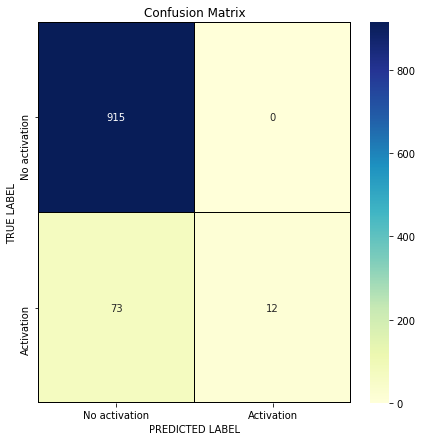

In [86]:
cm = confusion_matrix(y_test, y_pred_rfc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## Decision Tree 

In [37]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=1)
acc_dtc_cv=cross_val_score(estimator=dtc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Decision Classifier using K-fold cross validation is :",np.mean(acc_dtc_cv))

dtc.fit(X_train_b, Y_train_b)
y_pred_dtc = dtc.predict(x_val)
acc_dtc = metrics.accuracy_score(y_pred_dtc, y_val)
print('Accuracy of test Decision Tree Classifier is: ', metrics.accuracy_score(y_pred_dtc, y_val))
print('Classification report: ', classification_report(y_val, y_pred_dtc))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_dtc))

Average accuracy of Decision Classifier using K-fold cross validation is : 0.6897236961734696


DecisionTreeClassifier(criterion='entropy', max_depth=2)

Accuracy of test Decision Tree Classifier is:  0.904
Classification report:                precision    recall  f1-score   support

           0       0.90      1.00      0.95       904
           1       0.00      0.00      0.00        96

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.82      0.90      0.86      1000

Confusion matrix:  [[904   0]
 [ 96   0]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

#### Optimalizace parametrů 

In [39]:
grid = {'criterion' : ['gini', 'entropy'],
       'max_depth' : np.arange(1,10),
       'min_samples_split' : np.arange(2,10),
       'max_features' : ['auto', 'sqrt', 'log2']}

CV_dtc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5)
CV_dtc.fit(x_val, y_val)
print("tuned hyperparameters :",CV_dtc.best_params_)
print("tuned parameter accuracy (best score):",CV_dtc.best_score_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

tuned hyperparameters : {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 9}
tuned parameter accuracy (best score): 0.924


In [42]:
dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=9, min_samples_leaf=9, max_features='log2')
acc_dtc_cv2=cross_val_score(estimator=dtc,X=x_val,y=y_val,cv=10)  #K=10
print("Average accuracy of Decision Classifier using K-fold cross validation is :",np.mean(acc_dtc_cv2))

dtc2.fit(x_val, y_val)
y_pred_dtc2 = dtc2.predict(x_test)
acc_dtc2 = metrics.accuracy_score(y_pred_dtc2, y_test)
print('Accuracy of test Decision Tree Classifier is: ', metrics.accuracy_score(y_pred_dtc2, y_test))
print('Classification report: ', classification_report(y_test, y_pred_dtc2))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_dtc2))

Average accuracy of Decision Classifier using K-fold cross validation is : 0.9199999999999999


DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_leaf=9,
                       min_samples_split=9)

Accuracy of test Decision Tree Classifier is:  0.619
Classification report:                precision    recall  f1-score   support

           0       0.96      0.61      0.75       915
           1       0.15      0.72      0.24        85

    accuracy                           0.62      1000
   macro avg       0.55      0.66      0.49      1000
weighted avg       0.89      0.62      0.70      1000

Confusion matrix:  [[558 357]
 [ 24  61]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

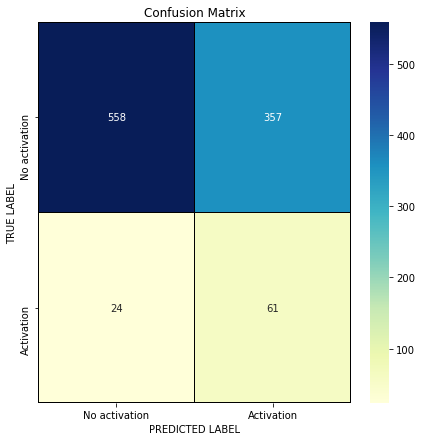

In [43]:
cm = confusion_matrix(y_test, y_pred_dtc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

#### Důležitost parametrů dle DT

In [44]:
model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=8, min_samples_leaf=1, max_features='log2') # XGBClassifier()
model.fit(X_train_b, Y_train_b)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)




DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_split=8)

,Variable,Importance
18,Transactions,0.349670
3,Saving_Amount,0.130357
4,Current_Amount,0.123607
11,Consumer_Loan_Amount,0.090319
6,Money_Amount,0.070983
12,Loans,0.050697
2,Ten_Groups,0.041954
13,Branch_Transactions,0.031984
16,Internet_Transactions,0.018815
17,Standing_Orders,0.018296


## Logistic Regression

In [45]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=100)
acc_lr_cv=cross_val_score(estimator=lr,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Logistic Regression using K-fold cross validation is :",np.mean(acc_lr_cv))

lr.fit(X_train_b, Y_train_b)
y_pred_lr = lr.predict(x_val)
acc_lr = metrics.accuracy_score(y_pred_lr, y_val)
print('Accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred_lr, y_val))
print('Classification report: ', classification_report(y_val, y_pred_lr))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_lr))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Average accuracy of Logistic Regression using K-fold cross validation is : 0.7738141051750437


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LogisticRegression()

Accuracy of Logistic Regression is:  0.689
Classification report:                precision    recall  f1-score   support

           0       0.95      0.69      0.80       904
           1       0.18      0.65      0.29        96

    accuracy                           0.69      1000
   macro avg       0.57      0.67      0.54      1000
weighted avg       0.88      0.69      0.75      1000

Confusion matrix:  [[627 277]
 [ 34  62]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [46]:
grid = {'penalty': ['l1', 'l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100]}

CV_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv= 5)
CV_lr.fit(x_val, y_val)
print("tuned hyperparameters :",CV_lr.best_params_)
print("tuned parameter accuracy (best score):",CV_lr.best_score_)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

tuned hyperparameters : {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
tuned parameter accuracy (best score): 0.923


#### Optimalizace parametrů 


In [47]:
lr2 = LogisticRegression(penalty='l2', C=10, solver = 'newton-cg')
acc_lr_cv2=cross_val_score(estimator=lr2,X=x_val,y=y_val,cv=10)  #K=10
print("Average accuracy of Logistic Regression using K-fold cross validation is :",np.mean(acc_lr_cv2))

lr2.fit(x_val, y_val)
y_pred_lr2 = lr2.predict(x_test)
acc_lr2 = metrics.accuracy_score(y_pred_lr2, y_test)
print('Accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred_lr2, y_test))
print('Classification report: ', classification_report(y_test, y_pred_lr2))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_lr2))

C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge',

Average accuracy of Logistic Regression using K-fold cross validation is : 0.921


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, solver='newton-cg')

Accuracy of Logistic Regression is:  0.918
Classification report:                precision    recall  f1-score   support

           0       0.94      0.98      0.96       915
           1       0.53      0.27      0.36        85

    accuracy                           0.92      1000
   macro avg       0.74      0.62      0.66      1000
weighted avg       0.90      0.92      0.91      1000

Confusion matrix:  [[895  20]
 [ 62  23]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

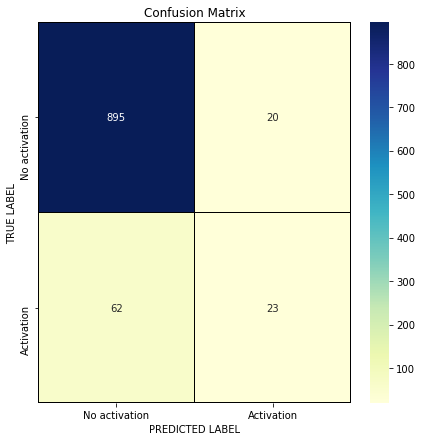

In [48]:
cm = confusion_matrix(y_test, y_pred_lr2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## KNN CLassifier

In [51]:
knc = KNeighborsClassifier(n_neighbors=5)
acc_knc_cv=cross_val_score(estimator=knc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of KNN classifier using K-fold cross validation is :",np.mean(acc_knc_cv))

knc.fit(X_train_b, Y_train_b)
y_pred_knc = knc.predict(x_val)
acc_knc = metrics.accuracy_score(y_pred_knc, y_val)
print('Accuracy of KNN classifier is: ', metrics.accuracy_score(y_pred_knc, y_val))
print('Classification report: ', classification_report(y_val, y_pred_knc))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_knc))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Average accuracy of KNN classifier using K-fold cross validation is : 0.8579679042239119


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy of KNN classifier is:  0.892
Classification report:                precision    recall  f1-score   support

           0       0.91      0.98      0.94       904
           1       0.25      0.06      0.10        96

    accuracy                           0.89      1000
   macro avg       0.58      0.52      0.52      1000
weighted avg       0.84      0.89      0.86      1000

Confusion matrix:  [[886  18]
 [ 90   6]]


###  Optimalizace parametrů 

In [54]:
grid ={"n_neighbors":np.arange(1,10), 'weights':['uniform', 'distance']}
CV_knc=GridSearchCV(KNeighborsClassifier(),grid,cv=10)#K=10 
CV_knc.fit(x_val,y_val)
print("tuned hyperparameter K:",CV_knc.best_params_)
print("tuned parameter accuracy (best score):",CV_knc.best_score_)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

tuned hyperparameter K: {'n_neighbors': 8, 'weights': 'uniform'}
tuned parameter accuracy (best score): 0.905


In [55]:
knc2 = KNeighborsClassifier(n_neighbors=8, weights = 'uniform')
acc_knc_cv2 = cross_val_score(estimator=knc2,X=x_val,y=y_val,cv=10)  #K=10
print("Average accuracy of KNN classifier using K-fold cross validation is :",np.mean(acc_knc_cv2))

knc2.fit(x_val,y_val)
y_pred_knc2 = knc2.predict(x_test)
acc_knc2 = metrics.accuracy_score(y_pred_knc2, y_test)
print('Accuracy of KNN classifier is: ', metrics.accuracy_score(y_pred_knc2, y_test))
print('Classification report: ', classification_report(y_test, y_pred_knc2))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_knc2))

Average accuracy of KNN classifier using K-fold cross validation is : 0.905


KNeighborsClassifier(n_neighbors=8)

Accuracy of KNN classifier is:  0.909


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Classification report:                precision    recall  f1-score   support

           0       0.91      0.99      0.95       915
           1       0.00      0.00      0.00        85

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.84      0.91      0.87      1000

Confusion matrix:  [[909   6]
 [ 85   0]]


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

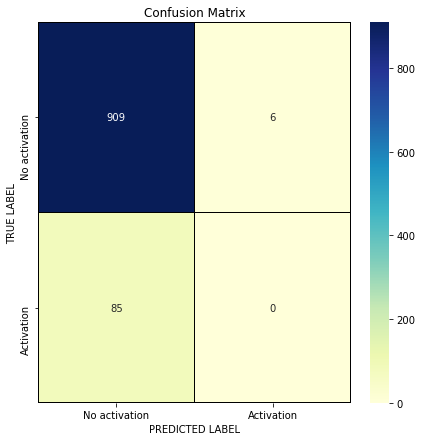

In [56]:
cm = confusion_matrix(y_test, y_pred_knc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

## Gradient Boost

In [57]:
gbc = GradientBoostingClassifier()
acc_gbc_cv=cross_val_score(estimator=knc,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Gradient Boosting classifier using K-fold cross validation is :",np.mean(acc_gbc_cv))

gbc.fit(X_train_b, Y_train_b)
y_pred_gbc = gbc.predict(x_val)
acc_gbc = metrics.accuracy_score(y_pred_gbc, y_val)
print('Accuracy of Gradient Boosting classifier is: ', metrics.accuracy_score(y_pred_gbc, y_val))
print('Classification report: ', classification_report(y_val, y_pred_gbc))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_gbc))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Average accuracy of Gradient Boosting classifier using K-fold cross validation is : 0.8579679042239119


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

Accuracy of Gradient Boosting classifier is:  0.296
Classification report:                precision    recall  f1-score   support

           0       0.97      0.23      0.37       904
           1       0.11      0.94      0.20        96

    accuracy                           0.30      1000
   macro avg       0.54      0.58      0.29      1000
weighted avg       0.89      0.30      0.35      1000

Confusion matrix:  [[206 698]
 [  6  90]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Optimalizace parametrů 

In [58]:
grid = {
       'loss': ['deviance', 'exponential'],
       'learning_rate' : [0.001, 0.01, 0.1]}
CV_gbc = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=grid, cv=5)
CV_gbc.fit(x_val,y_val)
print("tuned hyperparameters :",CV_gbc.best_params_)
print("tuned parameter accuracy (best score):",CV_gbc.best_score_)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential']})

tuned hyperparameters : {'learning_rate': 0.1, 'loss': 'deviance'}
tuned parameter accuracy (best score): 0.921


In [59]:
gbc2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, loss='deviance')
acc_gbc_cv2 = cross_val_score(estimator=gbc2,X=x_val,y=y_val,cv=10)  #K=10
print("Average accuracy of  Gradient Boosting classifier using K-fold cross validation is :",np.mean(acc_gbc_cv2))

gbc2.fit(x_val, y_val)
y_pred_gbc2 = gbc2.predict(x_test)
acc_gbc2 = accuracy_score(y_test, y_pred_gbc2)
print('Accuracy of Gradient Boosting classifier is: ', accuracy_score(y_test, y_pred_gbc2))
print('Classification report: ', classification_report(y_test, y_pred_gbc2))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_gbc2))

Average accuracy of  Gradient Boosting classifier using K-fold cross validation is : 0.924


GradientBoostingClassifier(loss='deviance', n_estimators=70)

Accuracy of Gradient Boosting classifier is:  0.915
Classification report:                precision    recall  f1-score   support

           0       0.93      0.98      0.95       915
           1       0.50      0.18      0.26        85

    accuracy                           0.92      1000
   macro avg       0.71      0.58      0.61      1000
weighted avg       0.89      0.92      0.90      1000

Confusion matrix:  [[900  15]
 [ 70  15]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

Text(0.5, 42.0, 'PREDICTED LABEL')

Text(42.0, 0.5, 'TRUE LABEL')

Text(0.5, 1.0, 'Confusion Matrix')

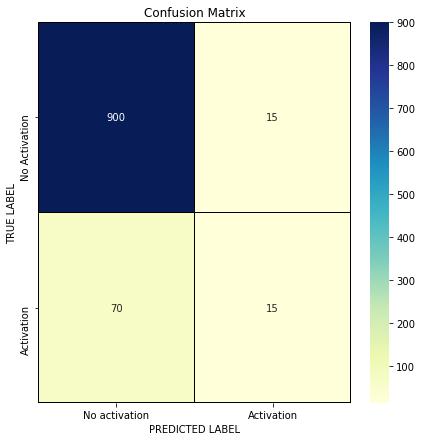

In [62]:
cm = confusion_matrix(y_test, y_pred_gbc2)
x_axis_labels = ["No activation", "Activation"]
y_axis_labels = ["No Activation", "Activation"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap='YlGnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

#### Důležitost parametrů 

In [63]:
model =GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, loss='deviance')
model.fit(X_train_b, Y_train_b)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(loss='deviance', n_estimators=70)

,Variable,Importance
18,Transactions,0.379113
3,Saving_Amount,0.144853
4,Current_Amount,0.121492
6,Money_Amount,0.094692
12,Loans,0.068971
2,Ten_Groups,0.034857
14,ATM_Transactions,0.029023
1,Age_Groups,0.025223
17,Standing_Orders,0.024715
11,Consumer_Loan_Amount,0.020034


## Bagging Classifier

In [64]:
bagclf = BaggingClassifier(n_estimators=100, bootstrap_features=True)
acc_bagclf_cv = cross_val_score(estimator=bagclf,X=X_train_b,y=Y_train_b,cv=10)  #K=10
print("Average accuracy of Bagging classifier using K-fold cross validation is :",np.mean(acc_bagclf_cv))

bagclf.fit(X_train_b,Y_train_b)
y_pred_bagclf = bagclf.predict(x_val)
acc_bagclf = accuracy_score(y_val, y_pred_bagclf)
print('Accuracy of Bagging classifier is: ', accuracy_score(y_val, y_pred_bagclf))
print('Classification report: ', classification_report(y_val, y_pred_bagclf))
print('Confusion matrix: ', confusion_matrix(y_val, y_pred_bagclf))

C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Average accuracy of Bagging classifier using K-fold cross validation is : 0.939044008797827


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(bootstrap_features=True, n_estimators=100)

Accuracy of Bagging classifier is:  0.534
Classification report:                precision    recall  f1-score   support

           0       0.90      0.55      0.68       904
           1       0.09      0.43      0.15        96

    accuracy                           0.53      1000
   macro avg       0.50      0.49      0.41      1000
weighted avg       0.82      0.53      0.63      1000

Confusion matrix:  [[493 411]
 [ 55  41]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


### Optimalizace parametrů

In [65]:
grid = {
       'bootstrap' : ['True', 'False'],
       'bootstrap_features' : ['True', 'False']}

CV_bagclf = GridSearchCV(estimator=BaggingClassifier(), param_grid=grid, cv=5)
CV_bagclf.fit(x_val, y_val)
print("tuned hyperparameters :",CV_bagclf.best_params_)
print("tuned parameter accuracy (best score):",CV_bagclf.best_score_)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'bootstrap_features': ['True', 'False']})

tuned hyperparameters : {'bootstrap': 'False', 'bootstrap_features': 'False'}
tuned parameter accuracy (best score): 0.917


In [66]:
bagclf2 = BaggingClassifier(n_estimators=100, bootstrap=False, bootstrap_features=False)
acc_bagclf_cv2 = cross_val_score(estimator=bagclf2,X=x_val,y=y_val,cv=10)  #K=10
print("Average accuracy of Bagging classifier using K-fold cross validation is :",np.mean(acc_bagclf_cv2))

bagclf2.fit(x_val, y_val)
y_pred_bagclf2 = bagclf2.predict(x_test)
acc_bagclf2 = accuracy_score(y_test, y_pred_bagclf2)
print('Accuracy of Bagging classifier is: ', accuracy_score(y_test, y_pred_bagclf2))
print('Classification report: ', classification_report(y_test, y_pred_bagclf2))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred_bagclf2))

Average accuracy of Bagging classifier using K-fold cross validation is : 0.8860000000000001


BaggingClassifier(bootstrap=False, n_estimators=100)

Accuracy of Bagging classifier is:  0.324
Classification report:                precision    recall  f1-score   support

           0       0.91      0.29      0.44       915
           1       0.08      0.67      0.14        85

    accuracy                           0.32      1000
   macro avg       0.49      0.48      0.29      1000
weighted avg       0.84      0.32      0.42      1000

Confusion matrix:  [[267 648]
 [ 28  57]]


C:\Users\bardo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


# Srovnání modelů bez optimalizace

,Model,Score
5,GradientBoost,0.296
0,RandomForest,0.520
4,BaggingClassifier,0.534
2,LogisticRegression,0.689
3,KNN,0.892
1,DecisionTree,0.904


<AxesSubplot:xlabel='Model', ylabel='Score'>

Text(0.5, 0, 'Klasifikátory')

Text(0, 0.5, 'Přesnost')

Text(0.5, 1.0, 'Klasifikátory vs Přesnost')

(0.0, 0.95)

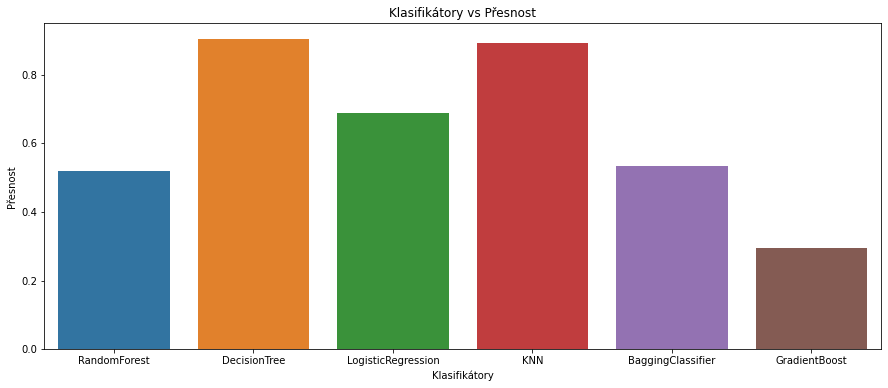

In [67]:
models = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Score' : [acc_rfc, acc_dtc, acc_lr, acc_knc, acc_bagclf, acc_gbc]})
models.sort_values(by='Score', ascending=True)
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(x='Model',y='Score', data=models)
ax.set_xlabel('Klasifikátory')
ax.set_ylabel('Přesnost')
ax.set_title('Klasifikátory vs Přesnost')
ax.set_ylim([0, 0.95])
plt.show()

# Srovnání modelů s optimalizací

,Model,Score
4,BaggingClassifier,0.324
1,DecisionTree,0.619
3,KNN,0.909
5,GradientBoost,0.915
2,LogisticRegression,0.918
0,RandomForest,0.925


<AxesSubplot:xlabel='Model', ylabel='Score'>

Text(0.5, 0, 'Klasifikátory')

Text(0, 0.5, 'GB Přesnost')

Text(0.5, 1.0, 'Klasifikátory vs GBPřesnost')

(0.0, 0.95)

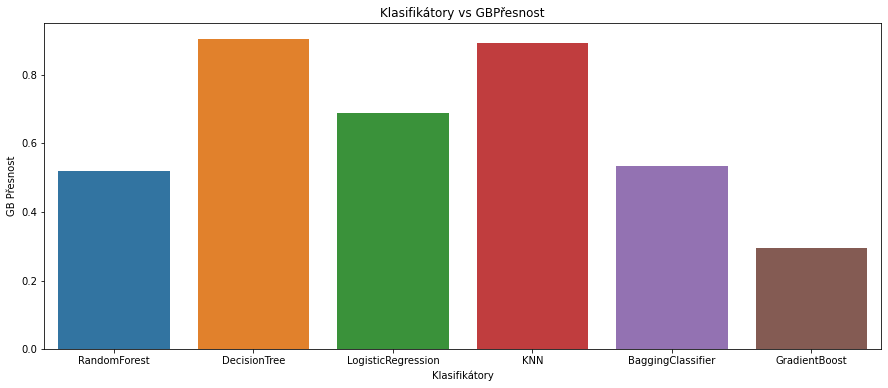

In [68]:
models2 = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Score' : [acc_rfc2, acc_dtc2, acc_lr2, acc_knc2, acc_bagclf2, acc_gbc2]})
models2.sort_values(by='Score', ascending=True)
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(x='Model',y='Score', data=models)
ax.set_xlabel('Klasifikátory')
ax.set_ylabel('GB Přesnost')
ax.set_title('Klasifikátory vs GBPřesnost')
ax.set_ylim([0, 0.95])
plt.show()

# ExtraTree klasifikátor pro features selekci

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_b,Y_train_b)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_b.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

# ROC křivky modelů

In [ ]:
y_pred_rfc_prob = rfc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_rfc_prob)
plt.title('ROC curve for test samples using Random Forest')
plt.show()

In [ ]:
y_pred_dtc_prob = dtc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_dtc_prob)
plt.title('ROC curve for test samples using Decision Tree')
plt.show()

In [ ]:
y_pred_lr_prob = lr.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_lr_prob)
plt.title('ROC curve for test samples using Logistic regressor')
plt.show()

In [ ]:
y_pred_knc_prob = knc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_knc_prob)
plt.title('ROC curve for test samples using KNN')
plt.show()

In [ ]:
y_pred_bagclf_prob = bagclf.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_bagclf_prob)
plt.title('ROC curve for test samples using Bagging Classifier')
plt.show()

In [ ]:
y_pred_gbc_prob = gbc.predict_proba(X_test_b)
skplt.metrics.plot_roc(Y_test_b, y_pred_gbc_prob)
plt.title('ROC curve for test samples using GradientBoosting Classifier')
plt.show()

# Senzitivita a specifita modelů

In [ ]:
cm1 =confusion_matrix(Y_test_b, y_pred_lr)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

In [ ]:
cm1 =confusion_matrix(Y_test_b, y_pred_rfc)
sensitivity2 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity2)

In [ ]:
cm1 =confusion_matrix(Y_test_b, y_pred_dtc)
sensitivity3 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity3)

In [ ]:
cm1 =confusion_matrix(Y_test_b, y_pred_knc)
sensitivity4 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity4)

In [ ]:
cm1 =confusion_matrix(Y_test_b, y_pred_gbc)
sensitivity5 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity5 )

specificity5 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity5)

In [ ]:
cm1 =confusion_matrix(Y_test_b, y_pred_bagclf)
sensitivity6 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity6 )

specificity6 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity6)

## Srovnání specifity modelů

In [ ]:
models1 = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Specifity' : [specificity2, specificity3, specificity1, specificity4, specificity6, specificity5]})
models1.sort_values(by='Specifity', ascending=True)


In [ ]:
models1.plot(kind = 'bar',
        x = 'Model',
        y = 'Specifity',
        color = 'lightblue')

## Srovnání senzitivity modelů

In [ ]:
models2 = pd.DataFrame({'Model' : ['RandomForest', 'DecisionTree', 'LogisticRegression', 'KNN', 'BaggingClassifier', 'GradientBoost'], 
                      'Senzitivity' : [sensitivity2, sensitivity3, sensitivity1, sensitivity4, sensitivity6, sensitivity5]})
models2.sort_values(by='Senzitivity', ascending=True)

In [ ]:
models2.plot(kind = 'bar',
        x = 'Model',
        y = 'Senzitivity',
        color = 'pink')